In [1]:

#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#read data
Data = pd.read_csv('C:/Users/enesg/PycharmProjects/EneSpotify/SpotiMySongs.csv')


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 18 columns):
danceability        613 non-null float64
energy              613 non-null float64
key                 613 non-null int64
loudness            613 non-null float64
mode                613 non-null int64
speechiness         613 non-null float64
acousticness        613 non-null float64
instrumentalness    613 non-null float64
liveness            613 non-null float64
valence             613 non-null float64
tempo               613 non-null float64
type                613 non-null object
id                  613 non-null object
uri                 613 non-null object
track_href          613 non-null object
analysis_url        613 non-null object
duration_ms         613 non-null int64
time_signature      613 non-null int64
dtypes: float64(9), int64(4), object(5)
memory usage: 86.3+ KB


In [4]:
Data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.541595,0.508683,5.398042,-10.250302,0.477977,0.060022,0.406517,0.172642,0.169962,0.418615,115.748021,246918.561175,3.885808
std,0.176638,0.240188,3.477490,5.908077,0.499923,0.069102,0.338756,0.325555,0.136204,0.251599,29.897323,76312.566708,0.423968
min,0.065000,0.001870,0.000000,-36.353000,0.000000,0.023400,0.000012,0.000000,0.031400,0.031600,48.718000,67383.000000,1.000000
25%,0.432000,0.339000,2.000000,-12.089000,0.000000,0.031700,0.088300,0.000000,0.093500,0.226000,91.958000,202147.000000,4.000000
50%,0.545000,0.519000,5.000000,-8.822000,0.000000,0.038700,0.327000,0.000211,0.116000,0.384000,114.813000,235987.000000,4.000000
75%,0.667000,0.687000,9.000000,-6.393000,1.000000,0.056400,0.724000,0.092400,0.189000,0.611000,135.958000,281160.000000,4.000000
max,0.957000,0.970000,11.000000,0.490000,1.000000,0.921000,0.996000,0.972000,0.895000,0.982000,204.120000,979720.000000,5.000000


In [5]:
Data.columns.tolist()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [6]:
cleanData=Data[['danceability','energy','key','loudness','mode','speechiness',
                'acousticness','instrumentalness','liveness','valence',
                'tempo','duration_ms','time_signature']]


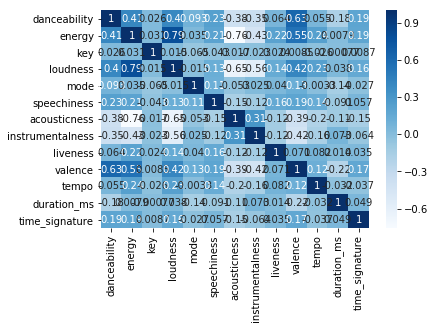

In [8]:
sns.heatmap(cleanData.corr(),cmap='Blues',annot=True)

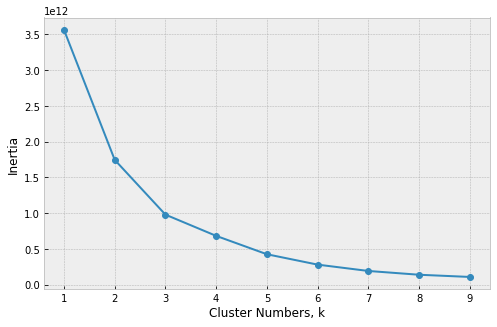

In [12]:
k_values=range(1,10)
inertias=[]

for k in k_values:
    model=KMeans(n_clusters=k)
    model.fit(cleanData)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(k_values,inertias, '-o')
plt.xlabel('Cluster Numbers, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()




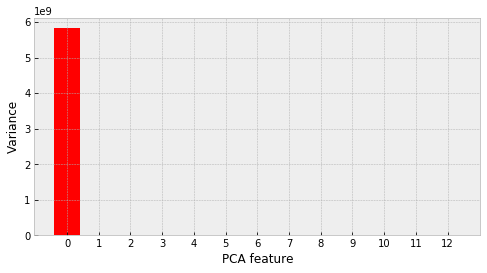

In [13]:
pca=PCA(random_state=123)
pca.fit(cleanData)
features=range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='red')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [17]:
pca=PCA(n_components=2, random_state=123)
Data_reduced=pca.fit_transform(cleanData)
print('Shape of the new Data df: ' + str(Data_reduced.shape))

Shape of the new Data df: (613, 2)


In [22]:
k_means=KMeans(n_clusters=3, random_state=123, n_init=30)
k_means.fit(Data_reduced)
y_clust = k_means.predict(Data_reduced)


print('inertia: %i | silhouette score:  %.3f'
    %(k_means.inertia_,
    silhouette_score(Data_reduced, y_clust, metric='euclidean')))

inertia: 978359122058 | silhouette score:  0.556


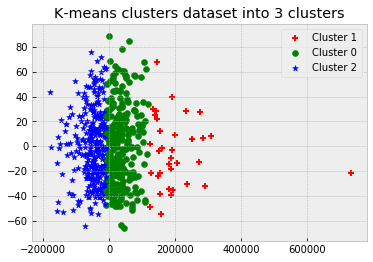

In [25]:
for i in range(0, Data_reduced.shape[0]):
    if k_means.labels_[i] == 1:
        c1 = plt.scatter(Data_reduced[i,0],Data_reduced[i,1],c='r',
        marker='+')
    elif k_means.labels_[i] == 0:
        c2 = plt.scatter(Data_reduced[i,0],Data_reduced[i,1],c='g',
        marker='o')
    elif k_means.labels_[i]==2:
        c3 = plt.scatter(Data_reduced[i,0],Data_reduced[i,1],c='b',
        marker='*')
plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
plt.title('K-means clusters dataset into 3 clusters')
plt.show()

well .. was just wondering.. clustering is not part of the project but wanted to see it. let me finish here and put this aside.